Load libraries



In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset

In [78]:
ev_market = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\EV_India_2014-2025_MarketData.csv")
ev_4w = ev_market[ev_market["Vehicle Type"] == "4W"]

# Filter Only 2W Data from EV Market Data



In [79]:
# Step 3: Filter 2W records from the full EV dataset
ev_2w = ev_market[ev_market["Vehicle Type"] == "2W"]

# Quick preview
ev_2w.head()


,Year,State,Vehicle Type,Registrations,EV Share (%),Chargers,FAME II Policy,Monthly Income Bracket (Main Buyer),Age Group,City Type,Psychographic Segment
0,2014,Delhi,2W,13656,1.01,82,0,40000-60000,36-45,Rural,Practical
3,2014,Maharashtra,2W,8088,0.45,10,0,40000-60000,36-45,Rural,Tech-savvy
6,2014,Karnataka,2W,9791,1.91,24,0,60000-100000,18-25,Semi-Urban,Tech-savvy
9,2014,Tamil Nadu,2W,9570,1.80,45,0,20000-40000,36-45,Semi-Urban,Cost-conscious
12,2014,Gujarat,2W,456,1.62,119,0,60000-100000,18-25,Semi-Urban,Luxury-focused


# National 2W Trend Over Time (2014–2025)

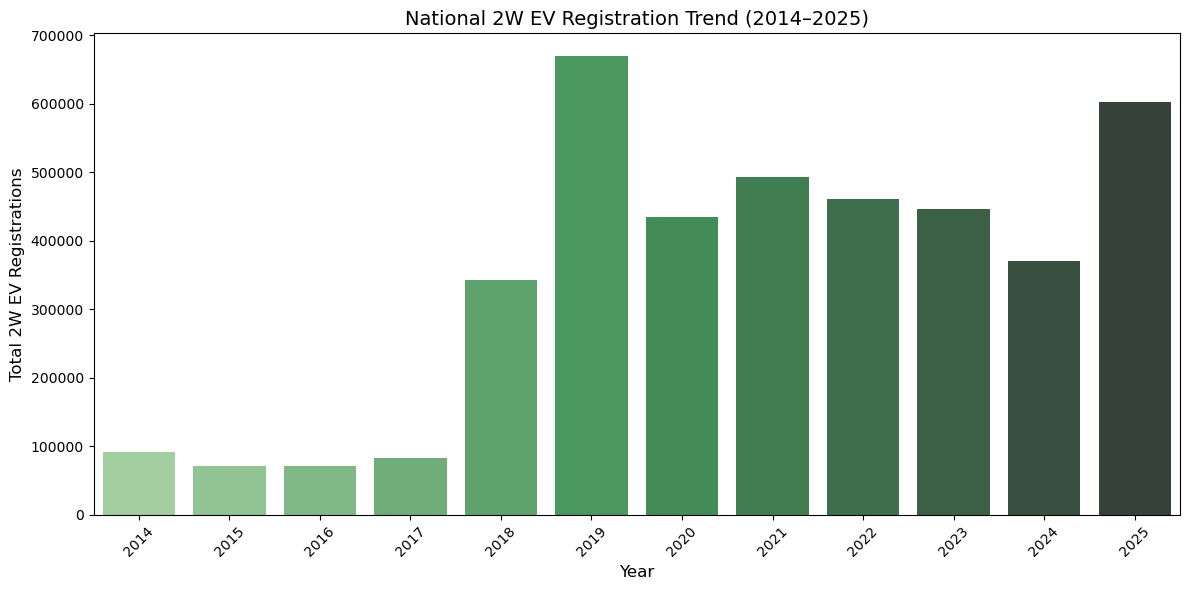

In [80]:
#  Group by year to get total 2W registrations
ev_2w_trend = ev_2w.groupby("Year")["Registrations"].sum().reset_index()

#  Plot the national trend
plt.figure(figsize=(12, 6))
sns.barplot(data=ev_2w_trend, x="Year", y="Registrations", palette="Greens_d")

plt.title("National 2W EV Registration Trend (2014–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total 2W EV Registrations", fontsize=12)
plt.xticks(rotation=45)  # ensure all years are readable
plt.tight_layout()
plt.show()


 Top 5 States by 2W EV Registrations (2014–2025)

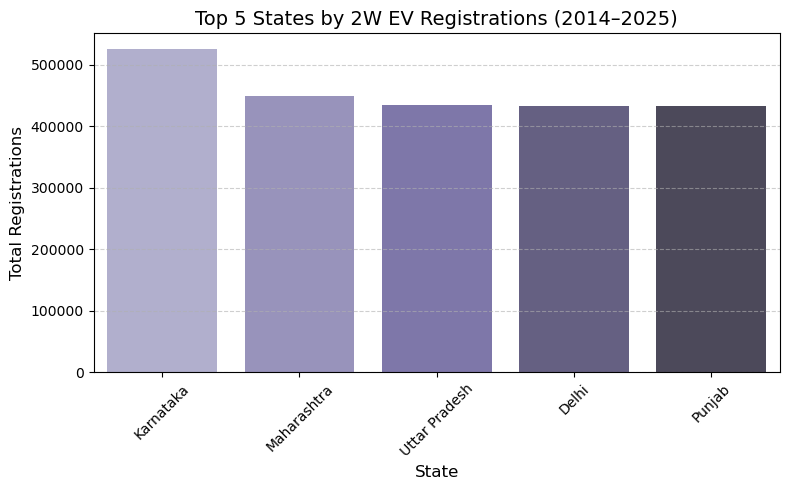

In [81]:
# Group 2W data by state and sum registrations
state_2w = ev_2w.groupby("State")["Registrations"].sum().reset_index()

# Sort and pick top 5
top_5_2w_states = state_2w.sort_values(by="Registrations", ascending=False).head(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_2w_states, x="State", y="Registrations", palette="Purples_d")

plt.title("Top 5 States by 2W EV Registrations (2014–2025)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


2W EV Buyers by Monthly Income Bracket

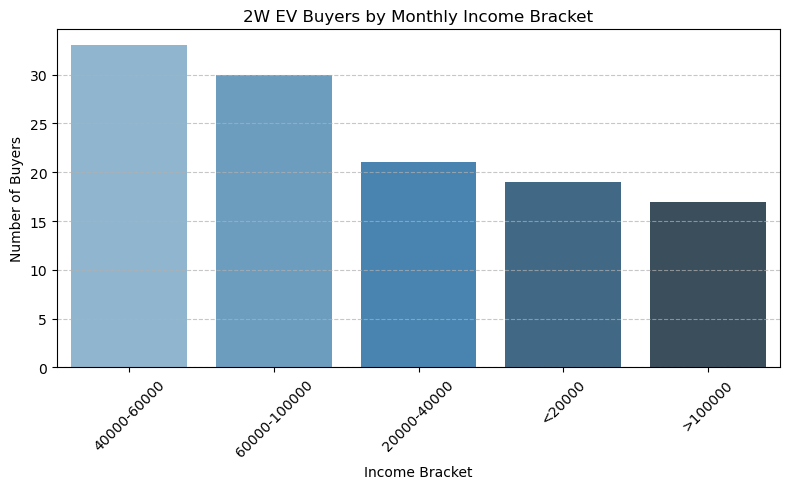

In [82]:
# Plot income segment distribution for 2W buyers
plt.figure(figsize=(8, 5))
sns.countplot(
    data=ev_2w,
    x='Monthly Income Bracket (Main Buyer)',
    order=ev_2w['Monthly Income Bracket (Main Buyer)'].value_counts().index,
    palette='Blues_d'
)

plt.title('2W EV Buyers by Monthly Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2W EV Buyers by Psychographic Segment

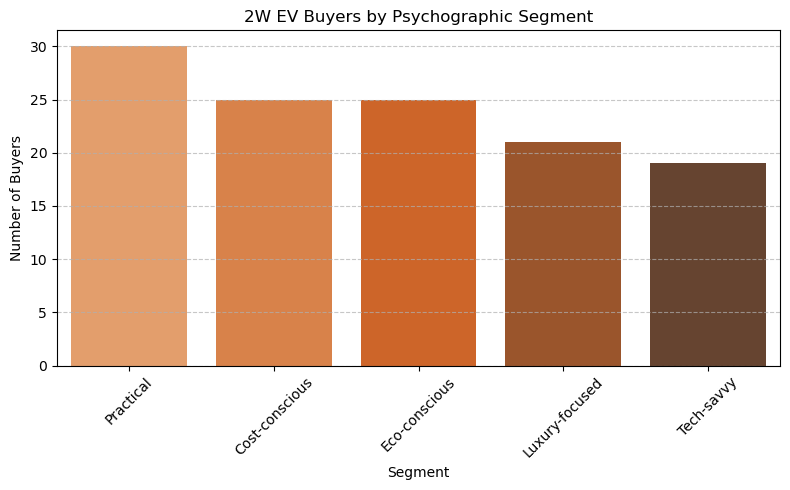

In [83]:
# Plot psychographic segment distribution for 2W buyers
plt.figure(figsize=(8, 5))
sns.countplot(
    data=ev_2w,
    x='Psychographic Segment',
    order=ev_2w['Psychographic Segment'].value_counts().index,
    palette='Oranges_d'
)

plt.title('2W EV Buyers by Psychographic Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Age demographic of 2W EV buyers.

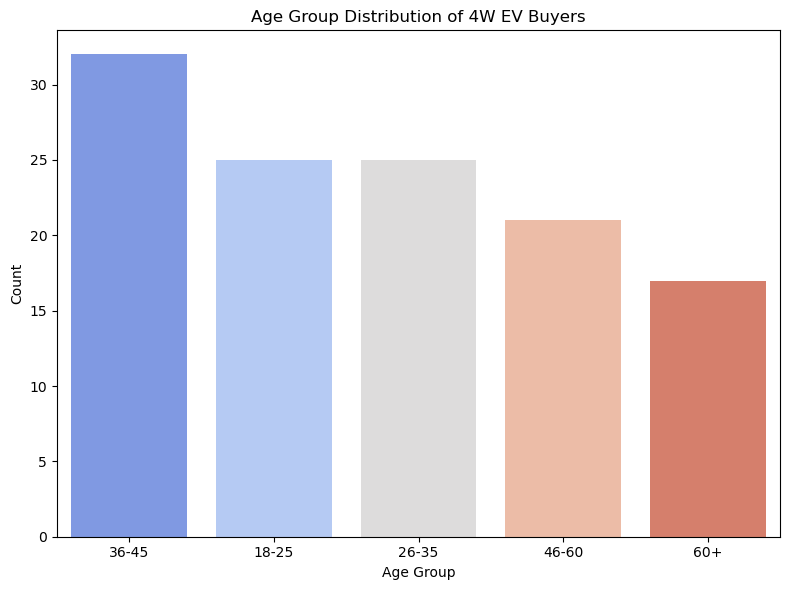

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ev_2w, x="Age Group", palette="coolwarm", order=ev_2w["Age Group"].value_counts().index)
plt.title("Age Group Distribution of 4W EV Buyers")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Urban vs rural vs semi-urban penetration of 2W EVs.

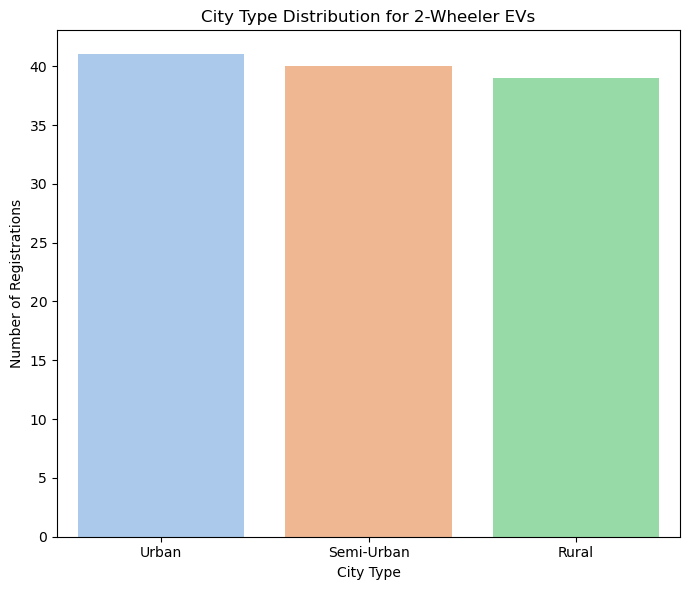

In [85]:
plt.figure(figsize=(7, 6))
sns.countplot(data=ev_2w, x="City Type", palette="pastel", order=ev_2w["City Type"].value_counts().index)
plt.title("City Type Distribution for 2-Wheeler EVs")
plt.xlabel("City Type")
plt.ylabel("Number of Registrations")
plt.tight_layout()
plt.show()


In [86]:
ev_pct = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\ev_registration_percentage_by_state.csv")

Top 10 States by 2W EV Volume and Share

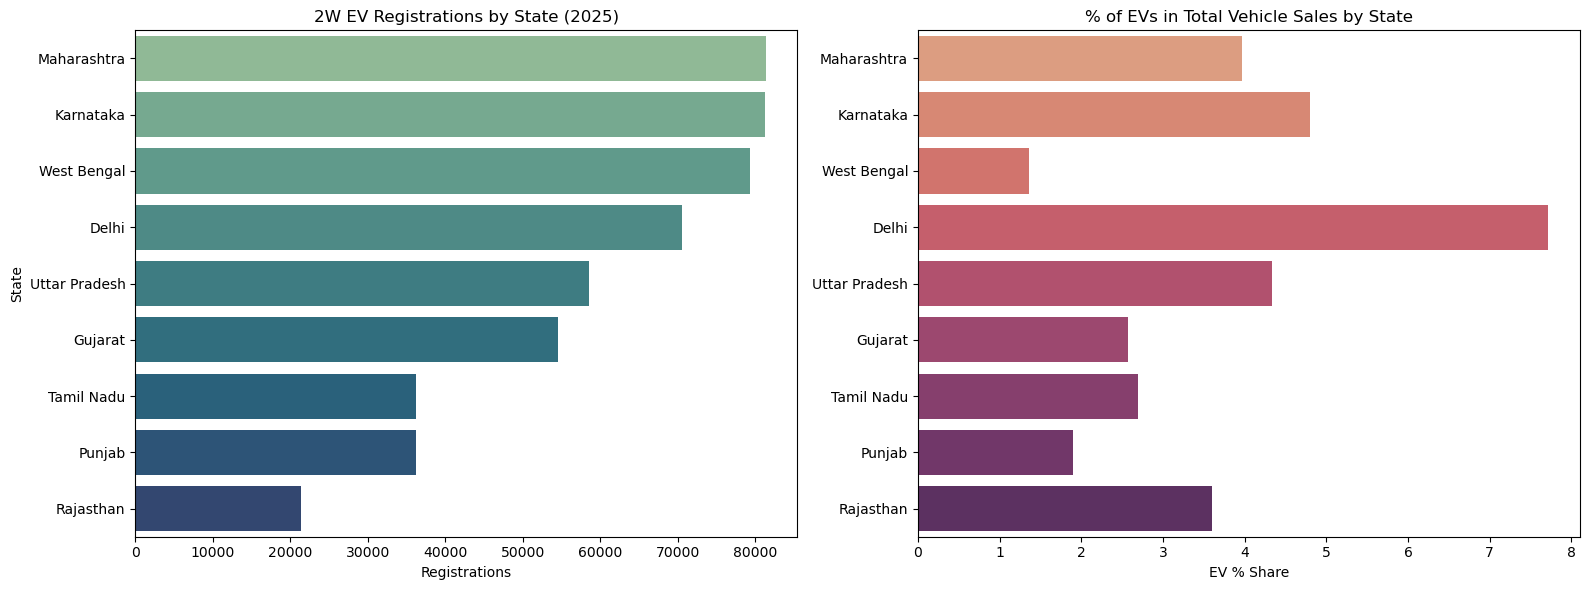

In [87]:
# Filter for 2W data
ev_2w_latest = ev_2w[(ev_2w["Vehicle Type"] == "2W") & (ev_2w["Year"] == 2025)]

# Keep only required columns
ev_2w_latest = ev_2w_latest[["State", "Registrations"]]

# Clean state names
ev_2w_latest["State"] = ev_2w_latest["State"].str.strip()
ev_pct.rename(columns={"State/ UT": "State"}, inplace=True)
ev_pct["State"] = ev_pct["State"].str.strip()

# Merge on common states
merged_2w = pd.merge(ev_2w_latest, ev_pct, on="State")

# Sort by registrations
merged_2w.sort_values(by="Registrations", ascending=False, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2W EV Registrations
sns.barplot(data=merged_2w, y="State", x="Registrations", palette="crest", ax=axes[0])
axes[0].set_title("2W EV Registrations by State (2025)")
axes[0].set_xlabel("Registrations")
axes[0].set_ylabel("State")

# Plot % Share of EVs
sns.barplot(data=merged_2w, y="State", x="% of Share of EV in Total Vehicles Sold", palette="flare", ax=axes[1])
axes[1].set_title("% of EVs in Total Vehicle Sales by State")
axes[1].set_xlabel("EV % Share")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# EVs per Charging Station (Infra Readiness)

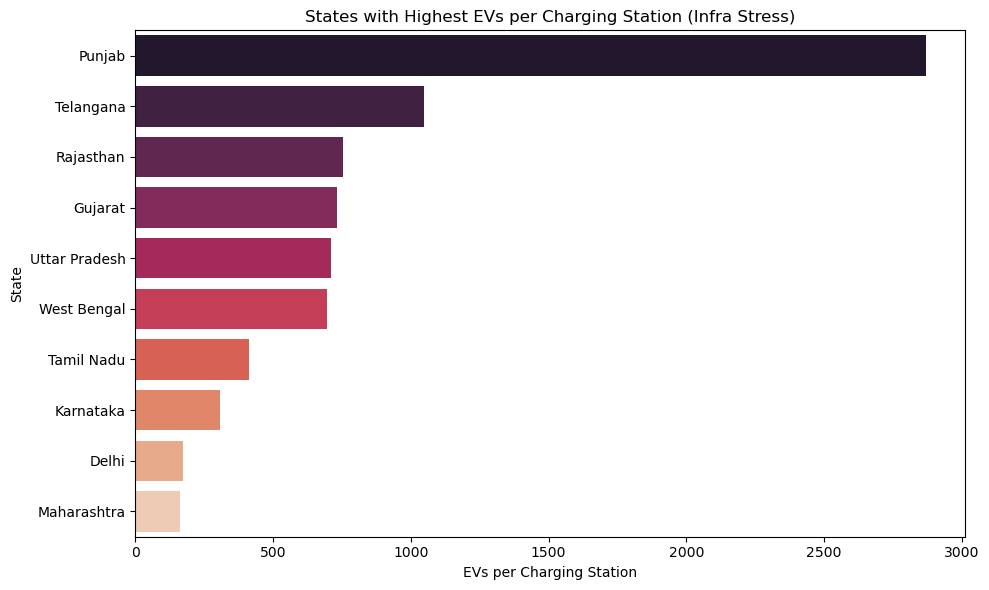

In [88]:
# 1. Load the charging station data
charging = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\charging_stations_data.csv")

# 2. Group EV data by State (use 'State' not 'State/ UT')
ev_state = ev_4w.groupby("State").agg({"Registrations": "sum"}).reset_index()
ev_state.rename(columns={"Registrations": "Total EV"}, inplace=True)

# 3. Merge EV and charging station data
infra = pd.merge(ev_state, charging, on="State", how="left")

# 4. Calculate EVs per charging station
infra["EVs_per_Charging_Station"] = infra["Total EV"] / infra["Operational_Charging_Stations"]

# 5. Top 10 infra-stressed states
top_stress = infra.sort_values(by="EVs_per_Charging_Station", ascending=False).head(10)

# 6. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_stress, x="EVs_per_Charging_Station", y="State", palette="rocket")
plt.title("States with Highest EVs per Charging Station (Infra Stress)")
plt.xlabel("EVs per Charging Station")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### 📈 Two-Wheeler EV YoY Growth Analysis with Auto Insights


In [89]:
# Calculate YoY growth in 2W EV registrations
ev_2w_trend['YoY_Growth (%)'] = ev_2w_trend['Registrations'].pct_change() * 100

# Round to 2 decimals
ev_2w_trend['YoY_Growth (%)'] = ev_2w_trend['YoY_Growth (%)'].round(2)

# Display the table
print("📈 Two-Wheeler EV Registration Trend and YoY Growth:\n")
print(ev_2w_trend)

# Generate insights
print("\n🔍 Key Insights:")
for i in range(1, len(ev_2w_trend)):
    year = ev_2w_trend.loc[i, "Year"]
    growth = ev_2w_trend.loc[i, "YoY_Growth (%)"]
    
    if growth > 50:
        print(f"🚀 {year}: Massive growth of {growth}% — likely due to strong policy push or market shift.")
    elif growth > 0:
        print(f"📈 {year}: Positive growth of {growth}% — steady adoption increasing.")
    elif growth < 0:
        print(f"📉 {year}: Decline of {growth}% — potential market or external disruption.")
    else:
        print(f"➖ {year}: No significant change.")


📈 Two-Wheeler EV Registration Trend and YoY Growth:

    Year  Registrations  YoY_Growth (%)
0   2014          91239             NaN
1   2015          71349          -21.80
2   2016          70702           -0.91
3   2017          82641           16.89
4   2018         341997          313.83
5   2019         669184           95.67
6   2020         434577          -35.06
7   2021         493082           13.46
8   2022         460987           -6.51
9   2023         445610           -3.34
10  2024         369662          -17.04
11  2025         602483           62.98

🔍 Key Insights:
📉 2015: Decline of -21.8% — potential market or external disruption.
📉 2016: Decline of -0.91% — potential market or external disruption.
📈 2017: Positive growth of 16.89% — steady adoption increasing.
🚀 2018: Massive growth of 313.83% — likely due to strong policy push or market shift.
🚀 2019: Massive growth of 95.67% — likely due to strong policy push or market shift.
📉 2020: Decline of -35.06% — potentia

### 📊 2W EV Registrations and YoY Growth (2014–2025)


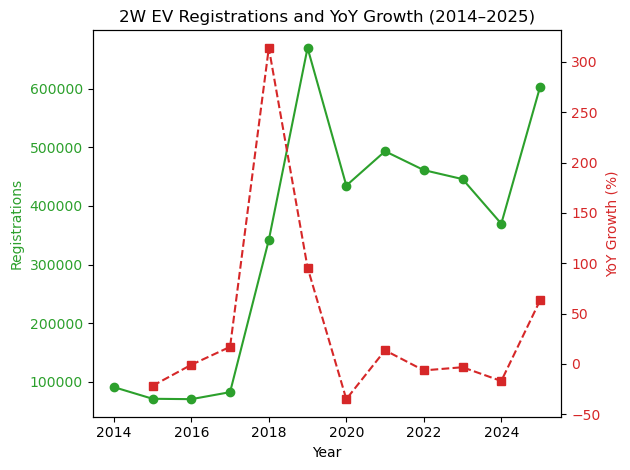

In [90]:
# Dual plot: Total registrations + YoY growth
fig, ax1 = plt.subplots()

# Line for registrations
color = 'tab:green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Registrations', color=color)
ax1.plot(ev_2w_trend['Year'], ev_2w_trend['Registrations'], color=color, marker='o', label='Registrations')
ax1.tick_params(axis='y', labelcolor=color)

# Twin axis for growth %
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('YoY Growth (%)', color=color)
ax2.plot(ev_2w_trend['Year'], ev_2w_trend['YoY_Growth (%)'], color=color, marker='s', linestyle='--', label='YoY Growth')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('2W EV Registrations and YoY Growth (2014–2025)')
fig.tight_layout()
plt.show()


### 🔍 Clustering States by Total 2W EV Adoption (K-Means)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📊 Mean Registrations by Cluster (Before Label Mapping):

Cluster
2    524984.000000
0    429379.285714
1    301437.000000
Name: Registrations, dtype: float64

✅ Final State-wise 2W Registrations with Correct Cluster Labels:

           State  Registrations  Cluster Cluster_Label
2      Karnataka         524984        2          High
1        Gujarat         307908        1           Low
9    West Bengal         294966        1           Low
0          Delhi         433777        0        Medium
3    Maharashtra         449918        0        Medium
4         Punjab         433024        0        Medium
5      Rajasthan         432479        0        Medium
6     Tamil Nadu         390834        0        Medium
7      Telangana         431442        0        Medium
8  Uttar Pradesh         434181        0        Medium


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28504\661230381.py:53: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


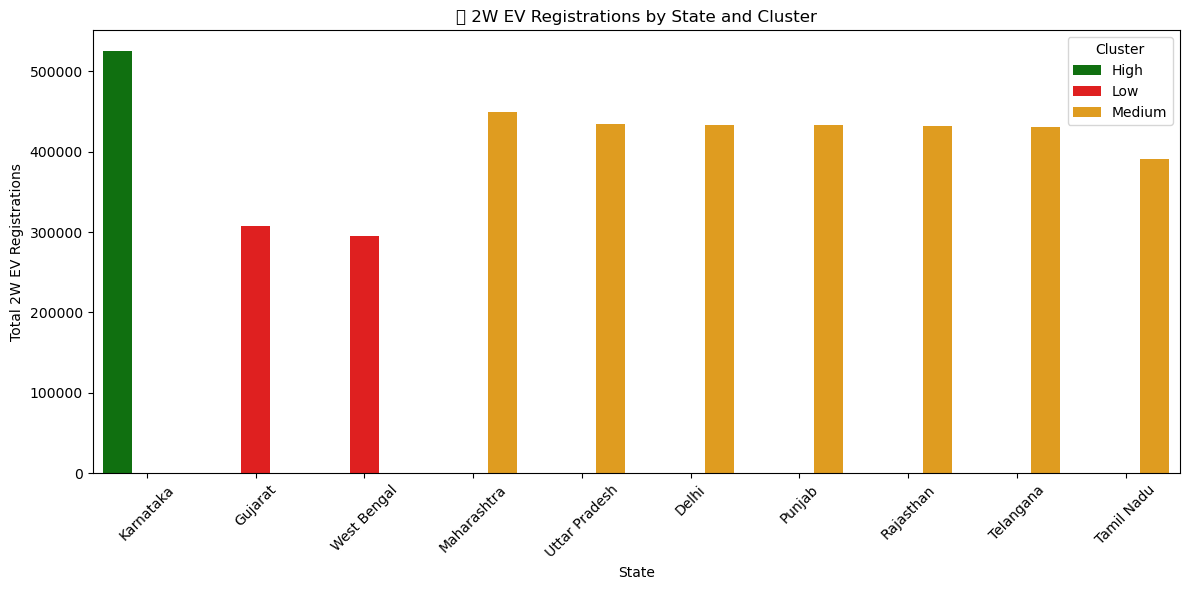

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 0: Group total 2W registrations by state
state_2w = ev_2w.groupby("State")["Registrations"].sum().reset_index()

# Step 1: Normalize registrations for clustering
scaler = StandardScaler()
state_2w_scaled = scaler.fit_transform(state_2w[["Registrations"]])

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
state_2w["Cluster"] = kmeans.fit_predict(state_2w_scaled)

# Step 3: Compute mean registrations for each cluster
cluster_means = state_2w.groupby("Cluster")["Registrations"].mean()

# Step 4: Rank the clusters and assign labels
cluster_rank = cluster_means.rank().astype(int) - 1  # convert to 0-based index
rank_to_label = {0: "Low", 1: "Medium", 2: "High"}
label_map = cluster_rank.map(rank_to_label)

# Step 5: Map corrected labels to the DataFrame
state_2w["Cluster_Label"] = state_2w["Cluster"].map(label_map)

# ✅ Print mean registrations per cluster (before label mapping)
print("📊 Mean Registrations by Cluster (Before Label Mapping):\n")
print(cluster_means.sort_values(ascending=False))

# ✅ Print final DataFrame with corrected cluster labels
print("\n✅ Final State-wise 2W Registrations with Correct Cluster Labels:\n")
print(state_2w.sort_values(by="Cluster_Label"))

# ✅ Visualize the corrected clusters
state_2w_sorted = state_2w.sort_values(by=["Cluster_Label", "Registrations"], ascending=[True, False])

palette = {"High": "green", "Medium": "orange", "Low": "red"}

plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_2w_sorted,
    x="State", y="Registrations",
    hue="Cluster_Label", palette=palette
)
plt.title("📍 2W EV Registrations by State and Cluster")
plt.xlabel("State")
plt.ylabel("Total 2W EV Registrations")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
